#Exploratory Data Analysis

Proyek ini berdasarkan modul Exploratory Data Analysis with Python for Beginner di platform DQLab. Disini saya akan mempraktekkan tahapan dalam melakukan exploratory data analysis.

In [1]:
#Mengecek jumlah baris dan kolom pada dataset
import pandas as pd
order_df = pd.read_csv("order.csv")
print(order_df.shape)

(49999, 12)


In [5]:
print(order_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49999 non-null  object 
 1   quantity               49999 non-null  int64  
 2   product_id             49999 non-null  object 
 3   price                  49999 non-null  int64  
 4   seller_id              49999 non-null  object 
 5   freight_value          49999 non-null  int64  
 6   customer_id            49999 non-null  object 
 7   order_status           49999 non-null  object 
 8   purchase_date          49999 non-null  object 
 9   payment_type           49999 non-null  object 
 10  product_category_name  49999 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB
None


In [10]:
#Mendapatkan quick summary dari segi kuantitas, harga, freight value, dan weight menggunakan fungsi describe()
print("Quick summary : \n", order_df.describe(include="all"))

#Mean dari total pembelian konsumen per transakssi kolom price
print("Mean dari total pembelian konsumen per transaksi pada kolom price : \n", order_df.loc[:, "price"].mean())


Quick summary : 
                                 order_id  ...  product_weight_gram
count                              49999  ...         49980.000000
unique                             42694  ...                  NaN
top     8272b63d03f5f79c56e9e4120aec44ef  ...                  NaN
freq                                  21  ...                  NaN
mean                                 NaN  ...          2201.830892
std                                  NaN  ...          3929.896875
min                                  NaN  ...            50.000000
25%                                  NaN  ...           300.000000
50%                                  NaN  ...           800.000000
75%                                  NaN  ...          1850.000000
max                                  NaN  ...         40425.000000

[11 rows x 12 columns]
Mean dari total pembelian konsumen per transaksi pada kolom price : 
 2607783.9156783135


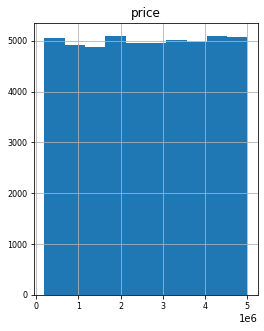

In [15]:
#Membuat distribusi data dengan histogram
import matplotlib.pyplot as plt

#Plot histogram kolom: price
order_df.hist(column="price", figsize=(4,5), bins=10, xlabelsize=8, ylabelsize=8)
plt.show()

In [16]:
#Mengecek standar deviasi dan varians

#Standar deviasi kolom product_weight_gram
order_df.loc[:, "product_weight_gram"].std()

#Varians kolom product_weight_gram
order_df.loc[:, "product_weight_gram"].var()

15444089.451064402

In [19]:
#Mengecek outlier pada data

#Menghitung quartile 1
Q1 = order_df[["product_weight_gram"]].quantile(0.25)
#Menghitung quartile 3
Q3 = order_df[["product_weight_gram"]].quantile(0.75)
#Menghitung interquartile
IQR = Q3 - Q1

print("IQR = \n", IQR)

IQR = 
 product_weight_gram    1550.0
dtype: float64


In [23]:
#Mengganti nama kolom freight_value menjadi shipping_cost

order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
pd.options.display.max_columns = 12

print(order_df)

                               order_id  quantity  \
0      2e7a8482f6fb09756ca50c10d7bfc047         2   
1      2e7a8482f6fb09756ca50c10d7bfc047         1   
2      e5fa5a7210941f7d56d0208e4e071d35         1   
3      3b697a20d9e427646d92567910af6d57         1   
4      71303d7e93b399f5bcd537d124c0bcfa         1   
...                                 ...       ...   
49994  ec88157ad03aa203c3fdfe7bace5ab6b         1   
49995  ed60085e92e2aa3debf49159deb34da7         1   
49996  ed98c37d860890f940e2acd83629fdd1         2   
49997  ed98c37d860890f940e2acd83629fdd1         1   
49998  ede4ebbb6e36cbd377eabcc7f5229575         1   

                             product_id    price  \
0      f293394c72c9b5fafd7023301fc21fc2  1489000   
1      c1488892604e4ba5cff5b4eb4d595400  1756000   
2      f3c2d01a84c947b078e32bbef0718962  1707000   
3      3ae08df6bcbfe23586dd431c40bddbb7  3071000   
4      d2998d7ced12f83f9b832f33cf6507b6  3833000   
...                                 ...      ...   

In [28]:
#Menghitung rata-rata dari price per payment_type menggunakan fungsi groupby()
rata_rata = order_df["price"].groupby(order_df["payment_type"]).mean()
print(rata_rata)

payment_type
credit card        2.600706e+06
debit card         2.611974e+06
e-wallet           2.598562e+06
virtual account    2.619786e+06
Name: price, dtype: float64


In [29]:
#Sorting
#Menghitung harga maksimum pembelian customer
sort_harga = order_df.sort_values(by="price", ascending=False)
print(sort_harga)

                               order_id  quantity  \
37085  d7b2d3b902441cf3dd12cd125533217d         1   
41958  2711089c7fec59d4dc8483e3c6a12fa3         1   
3976   f343624eab419250ad81f1ce6be22c93         1   
21072  c8947a583ab9791a5a9d02384cb84302         1   
47074  f6134169ca6f0cdfbe6458ebb5731613         1   
...                                 ...       ...   
33786  0d9e86e02c1a823b20c03ea29d616607         1   
42166  54220fcc516cabe9ec84b210c0765ef2         1   
31745  59a19c83ff825948739dd1601cc107b6         1   
42452  9960ee97c2f8d801a200a01893b3942f         1   
11939  64619901c45fba79638d666058bf6be6         1   

                             product_id    price  \
37085  35afc973633aaeb6b877ff57b2793310  5000000   
41958  7c1bd920dbdf22470b68bde975dd3ccf  5000000   
3976   777d2e438a1b645f3aec9bd57e92672c  5000000   
21072  f8cfb63e323be2e1c4172f255d61843d  5000000   
47074  2ea92fab7565c4fe9f91a5e4e1756258  5000000   
...                                 ...      ...   

Studi kasus menggunakan dataset order.csv

Hal yang perlu dilakukan antara lain:
1. Median price yang dibayar customer dari masing-masing metode pembayaran.
2. Tentukan metode pembayaran yang memiliki basket size (rataan median price) terbesar.
3. Ubah freight_value menjadi shipping_cost termahal dari data penjualan tersebut menggunakan sort.
4. Untuk product_category_name, berapa rata-rata weight produk tersebut dan standar deviasi mana yang kecil dari weight tersebut
5. Buat histogram quantity penjualan dari dataset tersebut untuk melihat persebaran quantity penjualan tersebut dengan bins = 5 dan figsize = (4,5)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

order_df = pd.read_csv("order.csv")

#Median price yang dibayar customer dari masing-masing metode pembayaran
median_price = order_df["price"].groupby(order_df["payment_type"]).median()
print("Median price yang dibayar oleh customer dari masing-masing metode pembayaran", median_price)

Median price yang dibayar oleh customer dari masing-masing metode pembayaran payment_type
credit card        2587500
debit card         2621500
e-wallet           2589000
virtual account    2643000
Name: price, dtype: int64


In [31]:
#Mengubah freight_value menjadi shipping_cost dan cari shipping_cost termahasl dari data penjualan tersebut menggunakan sort

order_df.rename(columns={"freight_value" : "shipping_cost"}, inplace=True)
sort_value = order_df.sort_values(by="shipping_cost", ascending=0)
print(sort_value)

                               order_id  quantity  \
23829  7d63cb1d349e7bd0ee1edcc61ea71077         1   
12011  00c9f7d4b0e87781465e562dc109f6aa         1   
10984  69013d19f8db4cd7dc9f3b5c2564a96f         1   
29722  f32c4d2b078bc5a354f4c1184522b5ff         1   
15259  c8eab0ccabe8cdfc2afce66c1c554ae2         1   
...                                 ...       ...   
2891   1d0e8770169496e47622b6cbc0d10bda         1   
36815  4bff82a994068f564e54b52b08ef4512         2   
8175   e6b1fa22555c3064f984ebeb8a88de77         1   
4034   8ac2728285fd4228f35d907768b5288a         4   
32994  0286e258217733541e80588e29c208c1         1   

                             product_id    price  \
23829  75d6b6963340c6063f7f4cfcccfe6a30  1472000   
12011  1a0d662b65b5ef08796501b064c853af  4543000   
10984  10d196ec072e2d8382c7ec9c942d7ea8  4137000   
29722  0f789be671fe3bd93cabfbb4a710f282  4802000   
15259  800f75019492a0d9ffb2483ae65b59f1  4078000   
...                                 ...      ...   

In [33]:
#Mencari rata-rata weight suatu produk pada product_category_name dan standar deviasi mana yang terkecil dari weight tersebut

mean_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).mean()
print(mean_value)
std_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).std()
print(std_value)

product_category_name
automotive     2129.559039
beauty         2120.088396
electronics    2144.751191
fashion        2246.516901
gadget         2229.632942
sports         2251.879909
toys           2203.863643
utilities      2291.029868
Name: product_weight_gram, dtype: float64
product_category_name
automotive     3799.884166
beauty         3837.474929
electronics    3839.271768
fashion        3858.885213
gadget         3955.792741
sports         4032.850044
toys           3956.814749
utilities      4150.509909
Name: product_weight_gram, dtype: float64


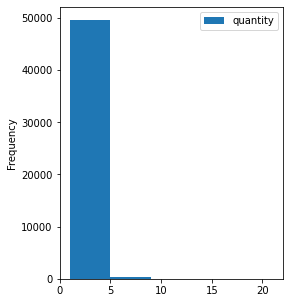

In [34]:
#Membuat histogram quantity penjualan dari dataset untuk melihat persebaran quantity penjualan tersebut untuk melihat persebaran quantity penjualan

order_df[["quantity"]].plot.hist(figsize=(4, 5), bins=5)
plt.show()